Primero, definimos las funciones mean(x) y var(x) para estimar la media y la varianza, además los probamos con un generador aleatorio de distribución normal.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def mean(x):
    sum=0
    for i in range(len(x)):
        sum += x[i]
    return sum/len(x)

In [13]:
def var(x):
    sig=[]    
    for i in range(len(x)):
        sig.append((x[i] - mean(x))**2)
    return np.sum(sig)/(len(x)-1)

In [14]:
x=np.random.normal(0,1,1000)
print(mean(x))
print(var(x))

-0.03059697104959235
1.0360722091094683


Luego, debemos definir la función de Boostrap Resampling.

In [15]:
def boost(x):
    x_al = np.zeros(len(x))
    for i in range(len(x)):
        x_al[i] = np.random.choice(x)
    return x_al

Ahora, utilizamos la función boost 100 veces para obtener 100 conjuntos con los cuales estimar la media y le varianza.

La media del conjunto brindado por Boostrap Resampling para una Distribución Gaussiana centrada en 0 con una varianza 1 es -0.016853041764090793 y su varianza es 0.9999746797143281


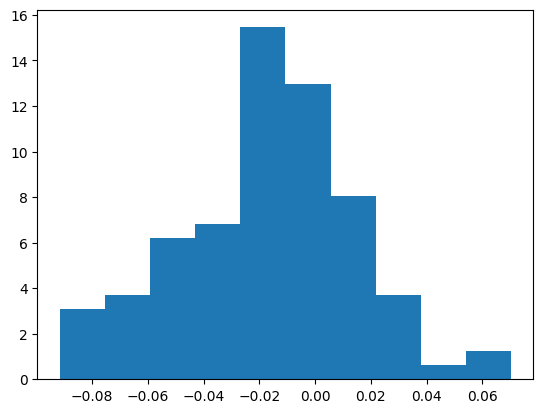

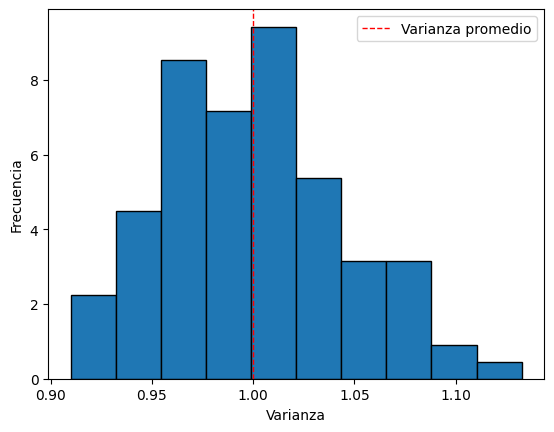

In [16]:
x=np.random.normal(0,1,1000)
n=100

med = []
vari = []

for i in range(n):
    listorti = boost(x)
    med.append(mean(listorti))
    vari.append(var(listorti))

m_x = np.sum(med)/n
v_x = np.sum(vari)/n

print('La media del conjunto brindado por Boostrap Resampling para una Distribución Gaussiana centrada en 0 con una varianza 1 es',
       m_x, 'y su varianza es', v_x)
plt.hist(med, density=True)
plt.show()

plt.hist(vari, density=True, edgecolor='black')
plt.xlabel('Varianza')
plt.ylabel('Frecuencia')
plt.axvline(v_x, color='r', linestyle='dashed', linewidth=1, label='Varianza promedio')
plt.legend()
plt.show()

Ahora, calcularemos el intervalo de confianza, para ello debemos definir la variable estandarizada y dar un $\alpha$ de significancia (un 95% de confianza). En este caso tomamos $\alpha = 0.05$ con lo que tenemos un $Z_{\frac{\alpha}{2}}=-1.96$ 

In [19]:
alpha=0.05
z_alpha = -1.96

z_1=v_x-z_alpha*np.sqrt(v_x/len(x))
z_2=v_x+z_alpha*np.sqrt(v_x/len(x))

print('El intervalo de confianza al 95% para la varianza es ['
      , z_2, ',', z_1, ']')

El intervalo de confianza al 95% para la varianza es [ 0.9379948222637775 , 1.0619545371648786 ]
